We pursue our analysis of the Salzman Model Lorenz by reproducing a result actually published by Lorenz 1963, who wanted to have a compelling intuition of the chaotic character of the model, in the chaotic regime. Julia is a strongly-typed language, mainly imperative, that is quite efficient for numerical simulation; as it also integrates Python's matplotlib, it seems to get the best of all worlds for numerical simulation. 

In [42]:
using ODE
using Pkg

The Lorenz model can be simply defined and, as we see it, Julia accepts greek symbols. 

In [51]:
function lorenz(t,u)
    σ,ρ,β = p
    dxdt = σ*(u[2]-u[1])
    dydt = u[1]*(ρ-u[3]) - u[2]
    dzdt = u[1]*u[2] - β*u[3]
    [dxdt;dydt;dzdt]
end

lorenz (generic function with 1 method)

We know carry out the numerical integration, with the `ode45` Runge-Kutta integration some of you will already be familiar with, on a time grid

In [52]:
dt = 0.001
tf = 100.0
t  = collect(0:dt:tf)
u0=[0.;0.1;0.1]
(t, u) = ode45(lorenz, u0, t);

The following commands simply map the three components of the $u$ matrix on vectors $x$, $y$ and $z$. 

In [53]:
x = map(v -> v[1], u)
y = map(v -> v[2], u)
z = map(v -> v[3], u);

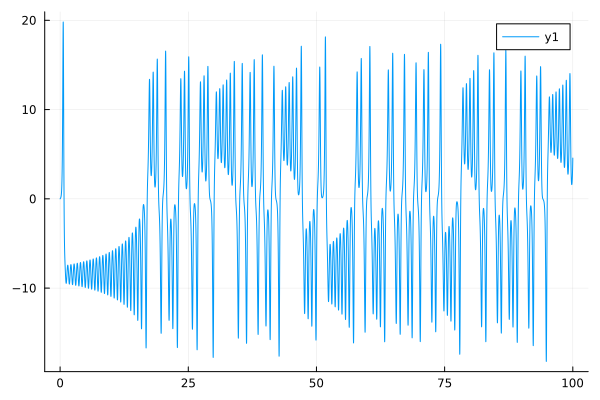

In [54]:
using Plots
plot(t,x)

We now use the `Peaks` contributed package to extract the local maxima of the $z-$series

In [55]:
using Peaks;

In [60]:
Zmax=findmaxima(z);

and we plot this series with respect to that same series shifted by one element. Mathematically, we plot $Z_{i+1}$ agains $Z_i$, where $Z$ is the series of maxima

In [57]:
Zmax1 = Zmax[2][1:(length(Zmax[2]))-1];
Zmax2 = Zmax[2][2:(length(Zmax[2]))];

In [58]:
plot(Zmax1,Zmax2, seriestype = :scatter);

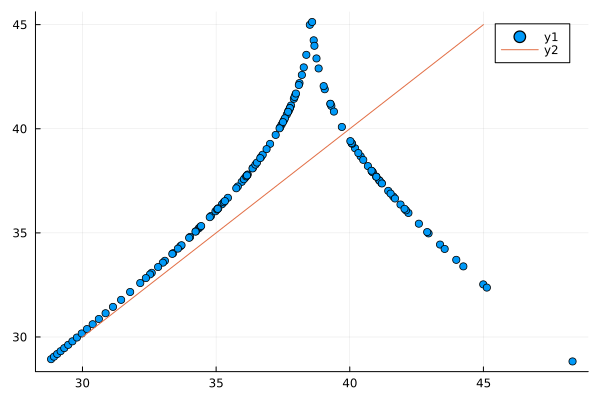

In [59]:
plot!([30,45],[30,45])

As we see it, the series of $Z$ behaves as a tent-map which, as we will see in the coming section, is indeed chaotic. 